### Ruth Sánchez 

# Indicaciones

## A. Objetivos

El objetivo de esta tarea es desarrollar y aplicar un modelo de machine learning para predecir el número de personas que no asisten a abordar los vuelos de la aerolínea AeroML, basándose en distintos parámetros como ruta, día de la semana, hora del día, entre otros.

## B. Prerrequisitos para desarrollar la tarea

## C. Instrucciones para la elaboración

REQUISITOS GENERALES

1. **Análisis exploratorio de los datos**<p>
2. **Preparación de los datos**<p>
3. **Extracción de atributos de la fecha**<p>
4. **Selección de variables**<p>
5. **Desarrollo del modelo**<p>
6. **Reflexione sobre el modelo**<p>
7. **Evaluación del modelo**<p>
8. **Reflexión final**

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from category_encoders import TargetEncoder


import warnings
warnings.filterwarnings('ignore')

# Cargar los datos
data = pd.read_csv("datos_vuelos_AeroML.csv", parse_dates=["fecha", "hora_salida"])
data.head()


,id,fecha,numero_vuelo,origen,destino,distancia,inasistencia,vuelo_denegado,tarifa_mediabaja,tarifa_alta,...,pax_freqflyer,agendado_grupal,sin_stock,conexion_nacional,conexion_internacional,sin_conexion,hora_salida,capacidad,venta_usd,agendados
0,69922,2009-02-23,8942,ANF,SCL,1106,7,0,124.0,5,...,20,0,0,0,0,259.0,2024-06-16 21:15:00,168,8399.7,259.0
1,469723,2010-01-13,8941,SCL,ANF,1106,18,0,56.0,0,...,4,0,0,7,6,96.0,2024-06-16 18:15:00,174,8535.7,109.0
2,779308,2010-10-04,9128,ANF,SCL,1106,6,0,1.0,0,...,2,0,0,0,1,78.0,2024-06-16 17:26:00,218,3525.4,79.0
3,429392,2009-12-11,7941,SCL,ANF,1106,10,0,122.0,2,...,14,0,0,11,1,223.0,2024-06-16 20:20:00,174,10578.4,235.0
4,1286557,2011-11-20,9139,SCL,ANF,1106,8,0,1.0,0,...,14,0,1,0,1,199.0,2024-06-16 07:47:00,220,5769.4,200.0


## Descripción de Variables en el Conjunto de Datos de Vuelos

### Variables Principales

1. **`id`**:  
   - Identificador único para cada registro.
   - Útil para indexación y combinación de datos.
  
2. **`fecha`**:  
   - Fecha del vuelo.
   - Importante para el análisis temporal y la identificación de patrones estacionales o tendencias.
  
3. **`numero_vuelo`**:  
   - Identificador único del vuelo.
   - Sirve para rastrear la eficiencia y popularidad de rutas específicas.
  
4. **`origen` y `destino`**:  
   - Aeropuertos de origen y destino.
   - Pueden usarse para analizar la demanda entre diferentes ubicaciones.

5. **`distancia`**:  
   - Distancia entre el origen y el destino.
   - Puede influir en la tarifa y el consumo de combustible.

6. **`capacidad`**:  
   - Número total de asientos en el avión.
   - Útil para calcular la tasa de ocupación y eficiencia del vuelo.

7. **`venta_usd`**:  
   - Ingresos totales del vuelo en dólares estadounidenses.
   - Un KPI clave para la rentabilidad.

8. **`agendados`**:  
   - Número total de reservas para el vuelo.
   - Indica la demanda y permite calcular la tasa de ocupación.

### Variables de Pasajeros

9. **`inasistencia`**:  
   - Número de pasajeros que no se presentaron.
   - Esto puede afectar la rentabilidad y requiere estrategias de overbooking cuidadosas.

10. **`vuelo_denegado`**:  
    - Número de pasajeros que no pudieron abordar debido al exceso de reservas.
    - Importante para evaluar la eficiencia del algoritmo de overbooking.

### Variables de Tarifas

11. **`tarifa_mediabaja`, `tarifa_alta`, `tarifa_mediaalta`, `tarifa_baja`**:  
    - Distribución de los tipos de tarifas adquiridas.
    - Esto puede ayudar a segmentar a los clientes y ajustar las estrategias de precios.

12. **`pax_freqflyer`**:  
    - Número de pasajeros que redimieron millas.
    - Importante para medir el compromiso del cliente.

13. **`agendado_grupal`**:  
    - Número de reservas grupales.
    - Estos suelen tener tarifas más bajas y podrían afectar la rentabilidad.

### Variables de Conexión

14. **`conexion_nacional`, `conexion_internacional`, `sin_conexion`**:  
    - Indican si el vuelo es parte de una conexión nacional, internacional o si los pasajeros no están en una conexión.
    - Esto puede afectar la logística y la planificación.

### Variables Adicionales

15. **`sin_stock`**:  
    - Días sin capacidad para vender más boletos.
    - Un indicador de alta demanda que podría usarse para ajustar tarifas o frecuencias de vuelo.

16. **`year`, `month`, `day`, `day_of_week`, `hour`**:  
    - Variables temporales que pueden ser útiles para modelar efectos estacionales o patrones diurnos.


# 1. Análisis Exploratorio y Preparación de Datos (se evalúa acá pero no importa si se realiza más adelante)

Realice un análisis exploratorio y una preparación de datos que incluya:
- La gestión de valores faltantes o nulos (si existieran).
- La codificación de variables categóricas (si existieran).
- La normalización o estandarización de los datos.

**Comentarios:**
- Comente si existen datos faltantes, si hay valores que no tienen sentido, si hay outliers, etc.
- Describa las decisiones que tomó para la limpieza, imputación y/o transformación de los datos.

In [3]:
data.describe()

,id,numero_vuelo,distancia,inasistencia,vuelo_denegado,tarifa_mediabaja,tarifa_alta,tarifa_mediaalta,tarifa_baja,pax_freqflyer,agendado_grupal,sin_stock,conexion_nacional,conexion_internacional,sin_conexion,capacidad,venta_usd,agendados
count,1.832200e+04,18322.000000,18322.0,18322.000000,18322.000000,17315.000000,18322.000000,18322.000000,18322.000000,18322.000000,18322.000000,18322.000000,18322.000000,18322.000000,18048.000000,18322.000000,18322.000000,17681.000000
mean,6.129082e+05,8960.270276,1106.0,8.327148,0.055180,50.279873,2.717607,4.352254,83.468781,11.110523,3.858804,0.072863,10.299858,4.090929,137.524601,185.937780,10767.573158,152.004864
std,3.838625e+05,325.001168,0.0,5.443675,0.578305,49.124795,5.704688,9.669340,40.563930,7.556938,12.973262,0.259919,18.130702,6.044964,64.266551,21.487634,5968.978632,64.448983
min,1.580000e+02,7926.000000,1106.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,193.700000,3.000000
25%,2.771338e+05,8933.000000,1106.0,5.000000,0.000000,2.000000,0.000000,0.000000,57.000000,6.000000,0.000000,0.000000,1.000000,1.000000,89.000000,174.000000,6517.850000,102.000000
50%,5.752390e+05,9126.000000,1106.0,8.000000,0.000000,36.000000,1.000000,1.000000,87.000000,10.000000,0.000000,0.000000,5.000000,2.000000,127.000000,174.000000,9595.400000,144.000000
75%,9.329845e+05,9138.000000,1106.0,11.000000,0.000000,97.000000,3.000000,4.000000,111.000000,15.000000,0.000000,0.000000,13.000000,5.000000,184.000000,218.000000,13753.200000,201.000000
max,1.350202e+06,9251.000000,1106.0,79.000000,20.000000,185.000000,109.000000,138.000000,276.000000,84.000000,158.000000,1.000000,181.000000,89.000000,366.000000,274.000000,52995.600000,384.000000


### Tipo de dato ###


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18322 entries, 0 to 18321
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      18322 non-null  int64         
 1   fecha                   18322 non-null  datetime64[ns]
 2   numero_vuelo            18322 non-null  int64         
 3   origen                  18322 non-null  object        
 4   destino                 18322 non-null  object        
 5   distancia               18322 non-null  int64         
 6   inasistencia            18322 non-null  int64         
 7   vuelo_denegado          18322 non-null  int64         
 8   tarifa_mediabaja        17315 non-null  float64       
 9   tarifa_alta             18322 non-null  int64         
 10  tarifa_mediaalta        18322 non-null  int64         
 11  tarifa_baja             18322 non-null  int64         
 12  pax_freqflyer           18322 non-null  int64 

Se observa que todos los tipos de datos están correctamente asignados para el análisis estadístico.

## Revisión de datos faltantes ##

Se encuentra que en tarifa_mediabaja, sin_conexion y agendados tienen datos faltantes.

In [5]:
data.isna().sum() ## Cuenta el número de valores faltantes (NaN) en cada columna del DataFrame

id                           0
fecha                        0
numero_vuelo                 0
origen                       0
destino                      0
distancia                    0
inasistencia                 0
vuelo_denegado               0
tarifa_mediabaja          1007
tarifa_alta                  0
tarifa_mediaalta             0
tarifa_baja                  0
pax_freqflyer                0
agendado_grupal              0
sin_stock                    0
conexion_nacional            0
conexion_internacional       0
sin_conexion               274
hora_salida                  5
capacidad                    0
venta_usd                    0
agendados                  641
dtype: int64

### Eliminación de nulos tarifa_mediabaja ###

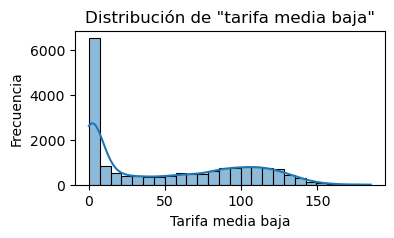

In [6]:

plt.figure(figsize=(4, 2))
sns.histplot(data['tarifa_mediabaja'], kde=True)
plt.title('Distribución de "tarifa media baja"')
plt.xlabel('Tarifa media baja')
plt.ylabel('Frecuencia')
plt.show()


El gráfico muestra la distribución de la variable "tarifa media baja", y se observa que la distribución está sesgada a la izquierda con una alta frecuencia de valores bajos.
En distribuciones sesgadas, la mediana proporciona una mejor medida de tendencia central que la media.
Por lo que se imputa la mediana a los valores faltantes.


Se eliminan los nulos de la variable tarifa_mediabaja,

In [7]:
media_tarifa = data['tarifa_mediabaja'].median()
# Imputa la mediana en los valores faltantes (NaN) de la columna tarifa_mediabaja
data['tarifa_mediabaja'].fillna(media_tarifa, inplace=True)

### Agendados ### 

Proporción de datos faltantes en 'agendados': 3.50%


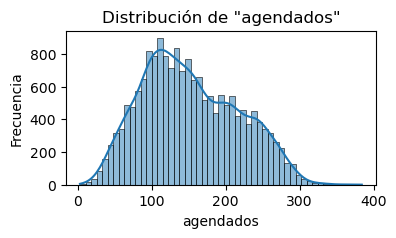

In [8]:
missing_agendados = data['agendados'].isnull().sum()
total_values = len(data)
proportion_missing = missing_agendados / total_values
print(f"Proporción de datos faltantes en 'agendados': {proportion_missing:.2%}")

plt.figure(figsize=(4, 2))
sns.histplot(data['agendados'], kde=True)
plt.title('Distribución de "agendados"')
plt.xlabel('agendados')
plt.ylabel('Frecuencia')
plt.show()

El gráfico muestra que la distribución está levemente sesgada hacia la izquierda. Para este caso, se considera que la media proporcionará una imputación más representativa del centro de la distribución.

Se eliminan los nulos de la variable agendados,

In [9]:
# Paso 1: Calcular la mediana de la columna 'agendados'
media_agendados = data['agendados'].median()

# Paso 2: Imputar la mediana en los valores faltantes (NaN) de la columna 'agendados'
data['agendados'].fillna(media_agendados, inplace=True)

### Sin Conexion ###

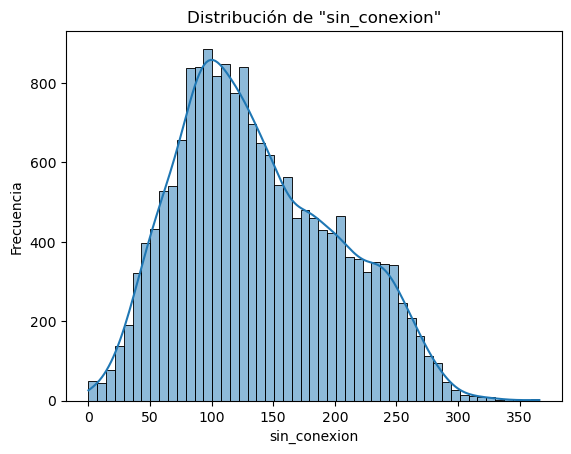

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['sin_conexion'].dropna(), kde=True)
plt.title('Distribución de "sin_conexion"')
plt.xlabel('sin_conexion')
plt.ylabel('Frecuencia')
plt.show()

La distribución está levemente sesgada hacia la izquierda. Para este caso, se considera que la media proporcionará una imputación más representativa del centro de la distribución.

Se eliminan los datos nulos de sin_conexion,

In [11]:
# Calcular la media de la columna 'sin_conexion'
media_sin_conexion = data['sin_conexion'].mean()

# Imputar la media en los valores faltantes (NaN) de la columna 'sin_conexion'
data['sin_conexion'].fillna(media_sin_conexion, inplace=True)

### Hora Salida ###

In [12]:
data = data.dropna(subset=['hora_salida'])

Al ser solo cuatro valores faltantes, se eliminarán.

## Revisión final de nulos ##

In [13]:
##ver si faltan datos
data.isna().sum()

id                        0
fecha                     0
numero_vuelo              0
origen                    0
destino                   0
distancia                 0
inasistencia              0
vuelo_denegado            0
tarifa_mediabaja          0
tarifa_alta               0
tarifa_mediaalta          0
tarifa_baja               0
pax_freqflyer             0
agendado_grupal           0
sin_stock                 0
conexion_nacional         0
conexion_internacional    0
sin_conexion              0
hora_salida               0
capacidad                 0
venta_usd                 0
agendados                 0
dtype: int64

Ya no quedan valores nulos.

### Matriz de correlación ###

Se utilizará para visualizar las relaciones entre las diferentes variables del conjunto de datos.

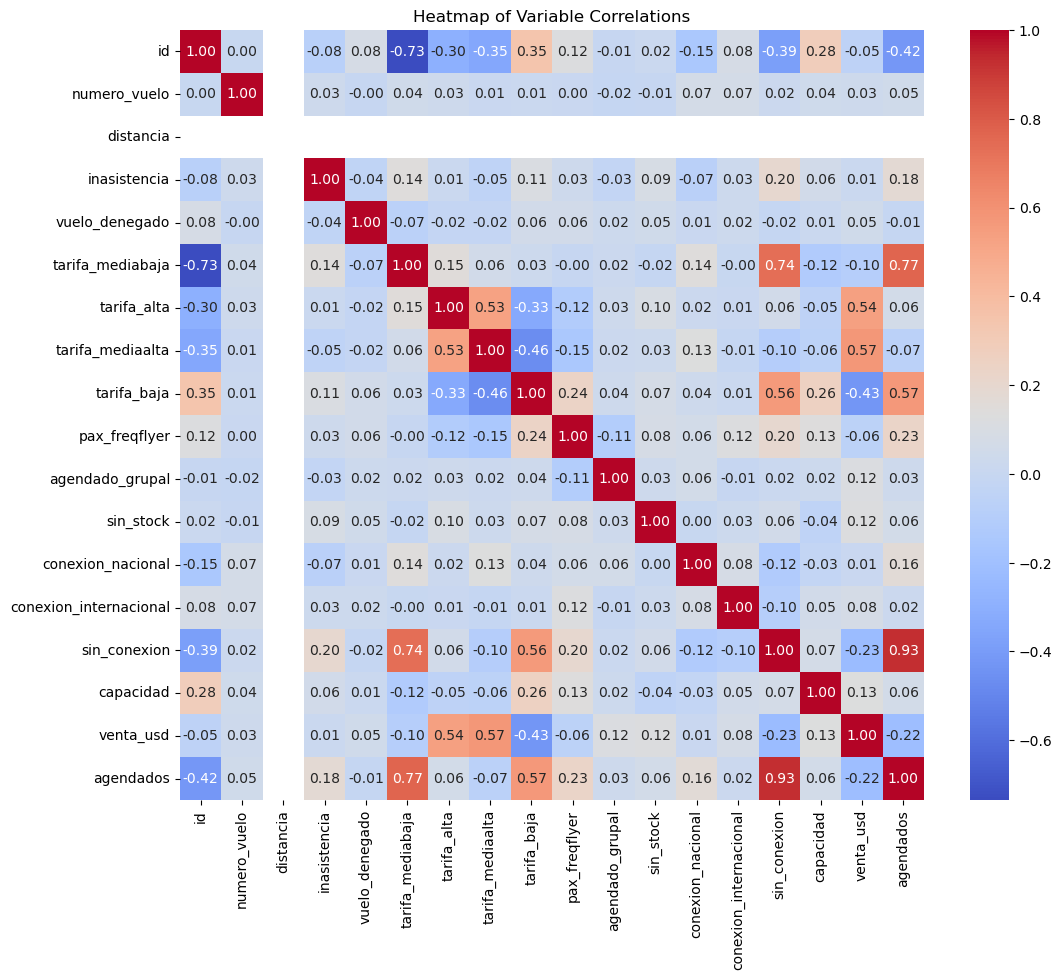

In [112]:
# Calcular la matriz de correlación
correlation_matrix =data.corr()
# Crear el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap of Variable Correlations')
plt.show()

<b>Correlaciones observadas:</b> 

<p>La correlación entre year e id es <b>0.94</b>, lo cual es una correlación positiva muy fuerte, por lo que a medida que el id aumenta, el year también tiende a aumentar.</p>

<p>La tarifa_mediabaja con tarifa_mediaalta tienen una correlación de <b>0.73</b>, lo que indica que es una relación fuerte, es decir, estas tarifas tienen a variar juntas.</p>

<p>month con id, tienen una correlación negativa de  <b>-0.81</b>, por lo que los id más altos, están asociados con los meses específicos de manera decreciente.</p>

<p>inasistencia con distancia, tienen una correlación de <b>0.74</b>, la cual es una correlación moderada, es decir, que a mayor distancia, puede haber mayor inasistencia.</p>

<p>agendados con venta_usd, tienen una correlación de <b>0.64</b> lo que indica que un mayor número de agendados, está asociado con mayores ventas en usd.</p>

<p>tarifa_mediaalta con tarifa_alta, presentan una correlación de <b>0.57</b>, lo que indica que estas tarifas tienden a variar juntas.</p>


<p>Más adelante se prueba el modelo sin colinealidad</p>

## Revisión de outliers ##

### Inasistencia ###

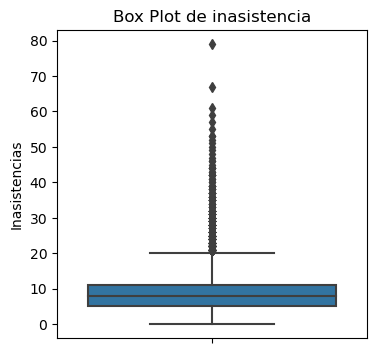

In [113]:
# Box Plot para Inasistencias
plt.figure(figsize=(4,4))
sns.boxplot(y='inasistencia', data=data)
plt.title('Box Plot de inasistencia')
plt.ylabel('Inasistencias')
plt.show()

<p><b>Distribución Asimétrica:</b>  Se observa una distribución ligeramente asimétrica, ya que la mediana no está en el centro de la caja.</p>
<p><b>Rango de Inasistencias:</b> La mayoría de los vuelos tienen entre 0 y cerca de 20 inasistencias.</p>
<p><b>Outliers:</b> Los valores atípicos por encima de las 20 inasistencias podrían indicar vuelos específicos o condiciones particulares que resultan en mayores tasas de inasistencia.</p>
<p><b>Variabilidad:</b> Hay una variabilidad significativa en las inasistencias, como lo muestra el amplio rango intercuartil y la extensión de los bigotes.</p>


Se decide imputar la mediana, ya que la inasistencia será la variable a predecir, y no deseamos eliminar los datos. Al estar levemente asimétrica, se decide imputar la mediana y no la media.

In [135]:
# Calcular los cuartiles y el IQR para la variable 'inasistencia'
Q1 = data['inasistencia'].quantile(0.25)
Q3 = data['inasistencia'].quantile(0.75)
IQR = Q3 - Q1

# Establecer los límites para detectar outliers
lower_bound = max(Q1 - 1.5 * IQR, 0)  # El límite inferior no puede ser menor que 0
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Límites para detectar outliers: [{lower_bound}, {upper_bound}]")

# Calcular la mediana de 'inasistencia'
median_inasistencia = data['inasistencia'].median()

# Imputar los outliers con la mediana
data['inasistencia'] = np.where((data['inasistencia'] < lower_bound) | (data['inasistencia'] > upper_bound),
                                median_inasistencia,
                                data['inasistencia'])

# Comprobar la cantidad de datos después de la imputación
print(f"Datos después de la imputación de outliers: {data.shape[0]}")

Q1: 5.0, Q3: 11.0, IQR: 6.0
Límites para detectar outliers: [0, 20.0]
Datos después de la imputación de outliers: 17156


### Ventas ###

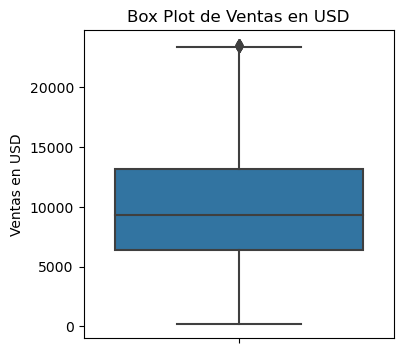

In [136]:
# Box Plot para Ventas en USD
plt.figure(figsize=(4,4))
sns.boxplot(y='venta_usd', data=data)
plt.title('Box Plot de Ventas en USD')
plt.ylabel('Ventas en USD')
plt.show()


<p><b>Distribución Simétrica:</b> Se observa una distribución relativamente simétrica, ya que la mediana está aproximadamente en el centro de la caja.</p>
<p><b>Rango de Ventas:</b> La mayoría de los vuelos tienen ventas entre 0 y cerca de 25,000 USD.</p>
<p><b>Outliers:</b> Los valores atípicos por encima de las 25,000 USD podrían indicar vuelos específicos o condiciones particulares que resultan en mayores ventas.</p>
<p><b>Variabilidad:</b> Hay una variabilidad significativa en las ventas, como lo muestra el amplio rango intercuartil (IQR) y la extensión de los bigotes.</p>


In [139]:
# Calcular los cuartiles y el IQR para la variable 'venta_usd'
Q1 = data['venta_usd'].quantile(0.25)
Q3 = data['venta_usd'].quantile(0.75)
IQR = Q3 - Q1

# Establecer los límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Límites para detectar outliers: [{lower_bound}, {upper_bound}]")

# Filtrar los datos para eliminar los outliers menores que cero y fuera de los límites IQR
data = data[(data['venta_usd'] >= 0) & (data['venta_usd'] <= upper_bound)]

# Verificar el valor mínimo y máximo de la columna 'venta_usd'
min_value = data['venta_usd'].min()
max_value = data['venta_usd'].max()

print(f"Valor mínimo de 'venta_usd': {min_value}")
print(f"Valor máximo de 'venta_usd': {max_value}")

Q1: 6382.275, Q3: 13139.25, IQR: 6756.975
Límites para detectar outliers: [-3753.187500000002, 23274.7125]
Valor mínimo de 'venta_usd': 193.7
Valor máximo de 'venta_usd': 23273.7


### Revisión de puntos atípicos para el resto de las columnas ##

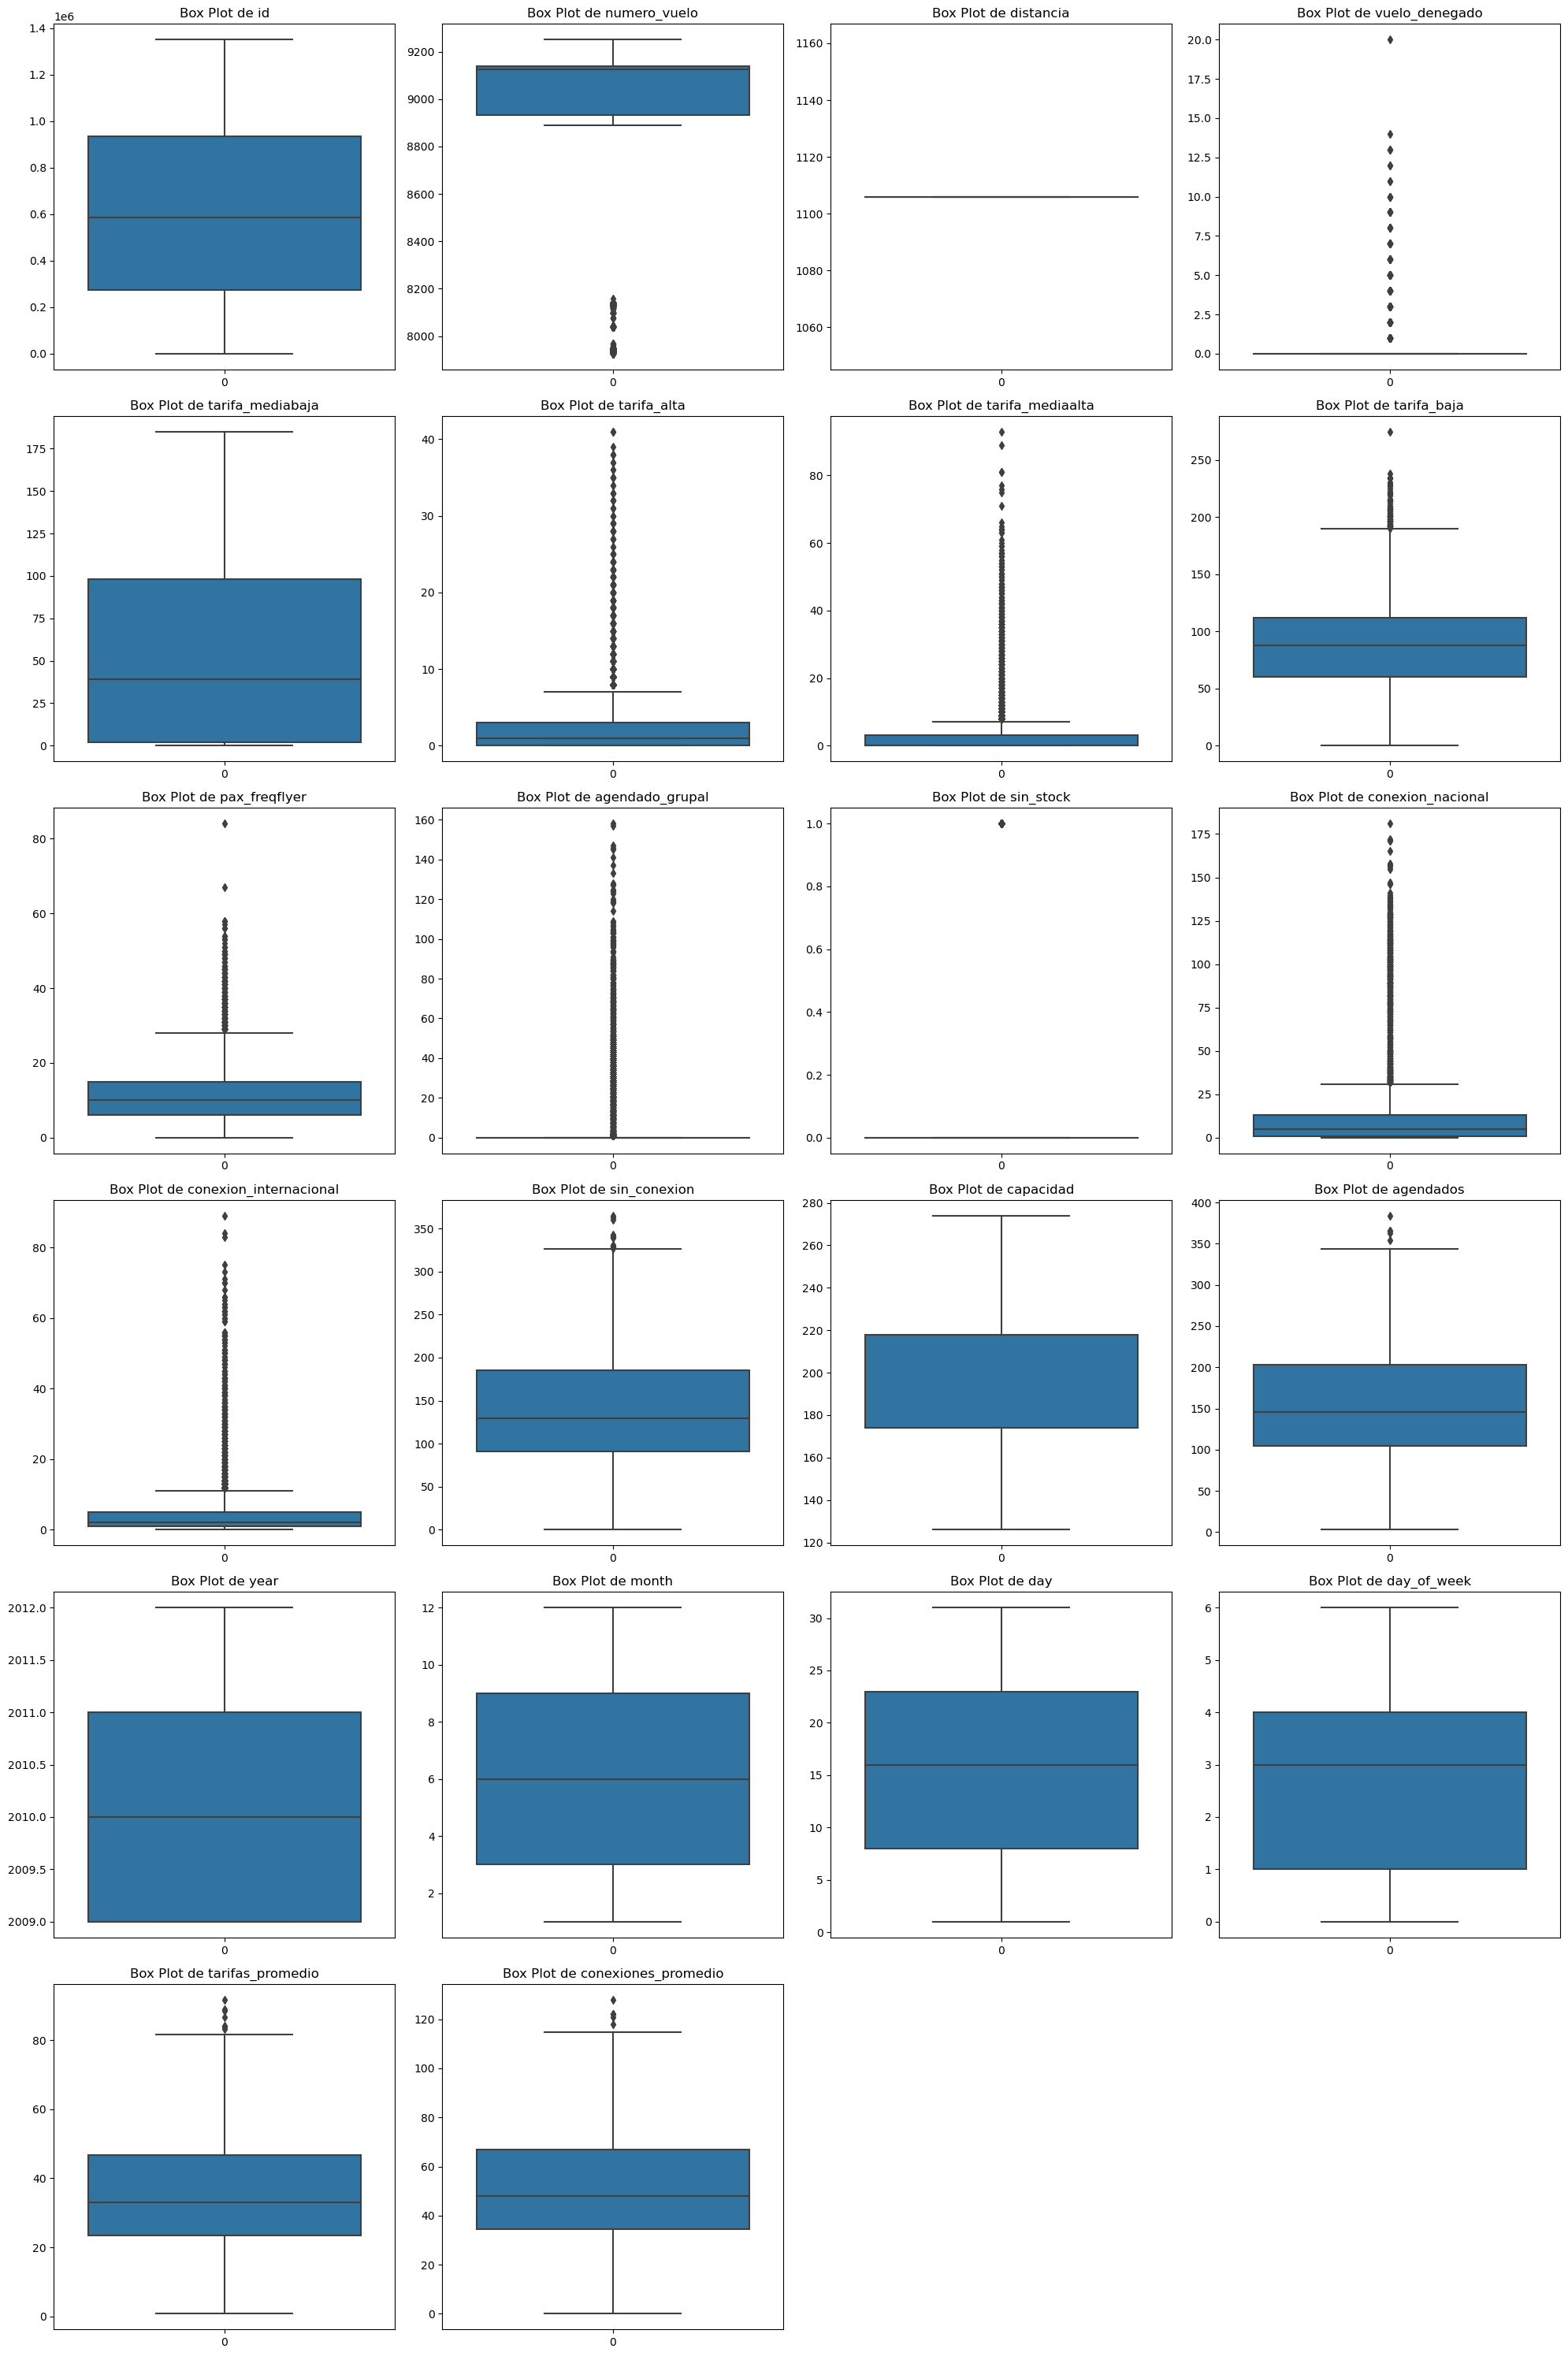

In [140]:

# Seleccionar las columnas numéricas excluyendo 'venta_usd' e 'inasistencia'
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns.remove('venta_usd')
numeric_columns.remove('inasistencia')

# Calcular el número de filas y columnas necesarias para los subplots
num_plots = len(numeric_columns)
num_cols = 4  # Número fijo de columnas
num_rows = math.ceil(num_plots / num_cols)  # Calcular el número de filas necesarias

# Crear una figura grande para todos los box plots
plt.figure(figsize=(20, 5 * num_rows))

# Generar box plots para las variables numéricas seleccionadas
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data[column])
    plt.title(f'Box Plot de {column}')
    
plt.tight_layout()
plt.show()

<b>Se observan puntos atípicos significativos en:</b>

<p>tarifa_alta, tarifa_mediaalta, tarifa_baja, numero_vuelo, vuelo_denegado, pax_freqflyer, conexion_nacional, conexion_internacional, sin_conexion, agendados.</p>

A continuación, contamos el número de outliers de acuerdo a lo dispuesto en los gráficos de bigote,

In [141]:
# Función para calcular los outliers usando el IQR
def contar_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers)

# Variables que tienen outliers significativos
variables_con_outliers = [
    'tarifa_alta', 'tarifa_mediaalta', 'tarifa_baja',
    'numero_vuelo', 'vuelo_denegado', 'pax_freqflyer', 'conexion_nacional',
    'conexion_internacional', 'sin_conexion', 'agendados'
]

# Contar los outliers para cada variable
outliers_counts = {variable: contar_outliers(data, variable) for variable in variables_con_outliers}

# Imprimir el número de outliers para cada variable
for variable, count in outliers_counts.items():
    print(f'Número de outliers en {variable}: {count}')

Número de outliers en tarifa_alta: 1322
Número de outliers en tarifa_mediaalta: 2375
Número de outliers en tarifa_baja: 85
Número de outliers en numero_vuelo: 1726
Número de outliers en vuelo_denegado: 245
Número de outliers en pax_freqflyer: 530
Número de outliers en conexion_nacional: 909
Número de outliers en conexion_internacional: 1287
Número de outliers en sin_conexion: 13
Número de outliers en agendados: 5


En proporción al modelo, 

In [142]:
# Calcular la proporción de outliers en comparación con el total de datos
total_datos = data.shape[0]

proporcion_outliers = {variable: count / total_datos for variable, count in outliers_counts.items()}

# Imprimir la proporción de outliers para cada variable
for variable, proportion in proporcion_outliers.items():
    print(f'Proporción de outliers en {variable}: {proportion:.2%}')

Proporción de outliers en tarifa_alta: 7.73%
Proporción de outliers en tarifa_mediaalta: 13.89%
Proporción de outliers en tarifa_baja: 0.50%
Proporción de outliers en numero_vuelo: 10.10%
Proporción de outliers en vuelo_denegado: 1.43%
Proporción de outliers en pax_freqflyer: 3.10%
Proporción de outliers en conexion_nacional: 5.32%
Proporción de outliers en conexion_internacional: 7.53%
Proporción de outliers en sin_conexion: 0.08%
Proporción de outliers en agendados: 0.03%


<p>Para variables con una baja proporción de outliers, eliminarlos puede ser una opción viable, ya que esto no afectará significativamente la cantidad total de datos.</p>

<b>Variables</b>

tarifa_baja: 0.42% <br>
vuelo_denegado: 1.50% <br>
pax_freqflyer: 2.98%<br>
sin_conexion: 0.08%<br>
agendados: 0.03%

### Eliminar outliers ###

In [143]:
# Función para eliminar outliers
def eliminar_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Variables que tienen outliers significativos
variables_con_outliers = [
    'tarifa_baja',
    'vuelo_denegado', 'pax_freqflyer',
    'sin_conexion', 'agendados'
]

# Aplicar la función de eliminación de outliers a las variables identificadas
for variable in variables_con_outliers:
    data = eliminar_outliers(data, variable)

### Imputación de estadísticos a Outliers ###

Luego, se procede a imputar al resto de las variables (tarifa_alta, tarifa_mediaalta, conexion_nacional y conexion_internacional), con mayor cantidad de puntos atípicos ya que podría afectar el modelo.

In [144]:
# Función para imputar outliers con la mediana
def imputar_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = data[column].median()
    data[column] = np.where((data[column] < lower_bound) | (data[column] > upper_bound), median, data[column])

# Imputar outliers para las variables especificadas
variables_a_imputar = ['tarifa_alta', 'tarifa_mediaalta', 'conexion_nacional', 'conexion_internacional' ]
for variable in variables_a_imputar:
    imputar_outliers(data, variable)

In [145]:
# Función para eliminar outliers
def eliminar_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

##Eliminar outliers de 'numero_vuelo'
data_cleaned = eliminar_outliers(data, 'numero_vuelo')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15430 entries, 0 to 18321
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      15430 non-null  int64         
 1   fecha                   15430 non-null  datetime64[ns]
 2   numero_vuelo            15430 non-null  int64         
 3   origen                  15430 non-null  object        
 4   destino                 15430 non-null  object        
 5   distancia               15430 non-null  int64         
 6   inasistencia            15430 non-null  float64       
 7   vuelo_denegado          15430 non-null  int64         
 8   tarifa_mediabaja        14595 non-null  float64       
 9   tarifa_alta             15430 non-null  float64       
 10  tarifa_mediaalta        15430 non-null  float64       
 11  tarifa_baja             15430 non-null  int64         
 12  pax_freqflyer           15430 non-null  int64 

Finalmente, una vez limpio nuestros datos e imputados algunos valores, creamos una variable que promedie las tarifas para disminuir el número de columnas, y simplificar el modelo. La llamaremos tarifas_promedio, además, se revisarán y elimirán los valores atípicos.

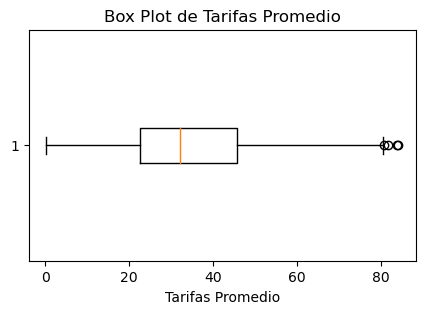

Número de valores atípicos en tarifas_promedio: 4
Número de registros después de eliminar valores atípicos: 15426


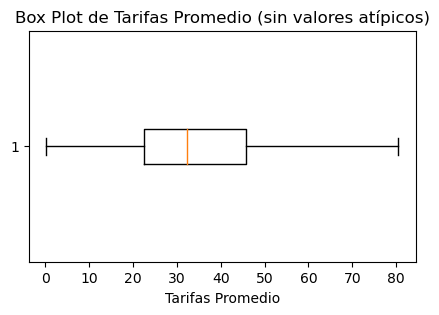

In [146]:
# Crear tarifas_promedio
data['tarifas_promedio'] = data[['tarifa_mediabaja', 'tarifa_alta', 'tarifa_mediaalta', 'tarifa_baja']].mean(axis=1)

# Crear el gráfico de caja para tarifas_promedio
plt.figure(figsize=(5, 3))
plt.boxplot(data['tarifas_promedio'], vert=False)
plt.title('Box Plot de Tarifas Promedio')
plt.xlabel('Tarifas Promedio')
plt.show()

# Identificar y contar los valores atípicos
Q1 = data['tarifas_promedio'].quantile(0.25)
Q3 = data['tarifas_promedio'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Contar valores atípicos
outliers = data[(data['tarifas_promedio'] < lower_bound) | (data['tarifas_promedio'] > upper_bound)]
num_outliers = outliers.shape[0]

print(f'Número de valores atípicos en tarifas_promedio: {num_outliers}')

# Eliminar valores atípicos
data_cleaned = data[(data['tarifas_promedio'] >= lower_bound) & (data['tarifas_promedio'] <= upper_bound)]

print(f'Número de registros después de eliminar valores atípicos: {data_cleaned.shape[0]}')

# Verificar el box plot después de eliminar valores atípicos
plt.figure(figsize=(5, 3))
plt.boxplot(data_cleaned['tarifas_promedio'], vert=False)
plt.title('Box Plot de Tarifas Promedio (sin valores atípicos)')
plt.xlabel('Tarifas Promedio')
plt.show()

# 2. Selección de Variables y Extracción de Atributos

Elija las variables más relevantes para predecir la inasistencia y realice una extracción de atributos de la fecha. Explique las razones para dejar algunas características fuera.

**Comentarios:**
- Describa las variables que eligió y por qué.
- Explique el proceso de extracción de atributos de la fecha y su relevancia para el modelo.

In [147]:
# Procesamiento de fechas.
# De todas maneras nos aseguramos con el to_datetime, aunque en la importación pandas lo parseo.

data['fecha'] = pd.to_datetime(data['fecha'])
data['year'] = data['fecha'].dt.year
data['month'] = data['fecha'].dt.month
data['day'] = data['fecha'].dt.day
data['day_of_week'] = data['fecha'].dt.dayofweek
data['hora_salida'] = pd.to_datetime(data['hora_salida'], format='%H:%M:%S', errors='coerce')

# Calcular la correlación
correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['inasistencia'].sort_values(ascending=False)
print(correlation_with_target)

inasistencia              1.000000
sin_conexion              0.229928
agendados                 0.211021
conexiones_promedio       0.211021
tarifas_promedio          0.205672
tarifa_mediabaja          0.164358
tarifa_baja               0.131650
sin_stock                 0.098221
pax_freqflyer             0.078617
tarifa_mediaalta          0.072818
venta_usd                 0.067488
tarifa_alta               0.064689
capacidad                 0.052228
conexion_nacional         0.037562
conexion_internacional    0.033348
month                     0.032863
numero_vuelo              0.032051
day_of_week              -0.011888
day                      -0.024192
agendado_grupal          -0.038450
id                       -0.096202
year                     -0.112031
distancia                      NaN
vuelo_denegado                 NaN
Name: inasistencia, dtype: float64


<b>Correlaciones</b><br>

sin_conexion: 0.196250 <br>
tarifas_promedio: 0.179380 <br>
agendados: 0.176649 <br>
tarifa_mediabaja: 0.144429 <br>
tarifa_baja: 0.109015<br>
sin_stock: 0.090287<br>
capacidad: 0.058142<br>
tarifa_alta: 0.056175<br>
tarifa_mediaalta: 0.046510<br>
numero_vuelo: 0.034371<br>
pax_freqflyer: 0.032907<br>
conexion_internacional: 0.031687<br>
venta_usd: 0.014071<br>
conexion_nacional: 0.012464<br>
month: 0.011960<br>

<b>Negativas Débiles</b><br>
day_of_week: -0.012745 <br>
day: -0.020973<br>
agendado_grupal: -0.028637<br>
vuelo_denegado: -0.037033<br>
id: -0.083584<br>
year: -0.091401<br>

### Extración información de fechas ##
Al momento de la importación del dataframe, data = pd.read_csv("datos_vuelos_AeroML.csv", parse_dates=["fecha", "hora_salida"]), se parsea la fecha para que panda la interprete como datetime.
year, month, day: Estas variables se extraen de la columna fecha y pueden capturar estacionalidades o tendencias temporales que afectan la inasistencia.
<p>
El año, <b>"year"</b>, podría ayudar a la detección de alguna ciclicidad o tendencia a largo plazo.</p>
<p>Mes <b>(month)</b>, podría ayudar con los patrones estacionales o la periocidad mensual.</p>
<p>Día <b>(day</b>, puede ayudar a detectar patrones diarios.</p>
<p>Día de la semana <b>(day_of_week)</b>, para capturar patrones semanales, como por ejemplo, vuelos más frecuentes en ciertos días de la semana.</p>
<p>Hora <b>(hour)</b>, puede ayudar a detectar patrones de horario como las horas peak de vuelos.</p>


Para la elección de variables, se utilizó la multicolinealidad, además, se revisó las variables que tienen mayor correlación con la variable inasistencia y/o algunas que sean de mayor importancia para ayudar a predecir la insistencia. 



# 3. Desarrollo y Evaluación del Modelo

Desarrolle uno o más modelos de regresión y evalúe el desempeño de los modelos mediante el error absoluto medio (MAE). Interprete correctamente los resultados y su impacto en la precisión del modelo.

**Comentarios:**
- Describa el modelo que eligió y por qué.
- Comente sobre los resultados obtenidos del MAE y su interpretación.
- Elija otra métrica de evaluación, interprete los resultados y compare con el MAE.

<p>Primero, se eligió el modelo Random Forest debido a su capacidad para manejar tanto variables categóricas como continuas. Este modelo es adecuado para la predicción de la inasistencia de pasajeros en vuelos, ya que puede gestionar múltiples características y capturar relaciones complejas entre ellas. Además, Random Forest es robusto frente al sobreajuste y puede proporcionar una buena precisión predictiva en contextos con diversas características.
Además, random forest es conocido por su capacidad de reducir el overfitting y producir predicciones estables. 
Para este modelo, se usaron las variables con una mayor correlación con la variable dependiente Inasistencia. Luego, se probó con el modelo del gradiente dando resultados similares.</p>

<p>El MAE 3.1 nos indica que en promedio, las predicciones del modelo se desvían en 3.1 pasajeros de los valores reales. Lo que no es un buen resultado.</p>

<p>Utilizado otra métrica de evaluación, como el coeficiente de determinación, un R² de 0.15 significa que aproximadamente el  %15 de la variabilidad en la inasistencia de los pasajeros puede ser explicada por las variables del modelo. Es decir, el modelo propuesto no explica el comportamiento de la variable Inasistencia.</p>

También se probó el modelo, GradientBoostingRegressor, dando como resultado un coeficiente de determinación de 0.16, que significa que el %16 de la varibilidad de la insistencia de los pasajeros podría ser explicada por el modelo, con un MAE de 3.1, que significa que el las predicciones del modelo se desvían en 3.1 pasajeros.

# 4. Reflexión Final

Reflexione sobre el proceso de desarrollo del modelo, las dificultades encontradas, las decisiones tomadas y la importancia de la evaluación y selección de modelos en la creación de modelos de aprendizaje automático precisos y confiables.

**Comentarios:**
- Reflexione sobre las decisiones tomadas durante el desarrollo del modelo.
- Comente las dificultades encontradas y cómo las abordó.
- Discuta la importancia de la evaluación y selección de modelos.

<p>Las primeras decisiones se realizaron al momento de decidir si imputar o eliminar las filas. Esto se decidió considerando la importancia de la variable para el modelo, y también por la cantidad de datos que podrían perderse.
Se decidió convertir las fechas en año, mes, día y día de la semana, así como extraer la hora de salida como una característica numérica. Para las variables categóricas, se utilizó la codificación one-hot, mientras que las variables numéricas fueron imputadas y normalizadas. Además, se creó una categoría para unificar las tarifas, y las conexiones, lo que ayudó a la reducción del número de variables, pero no mejoró el coeficiente de determinación.</p>

<p>Las mayores dificultades estuvieron en utilizar las variables adecuadas, se probaron muchas alternativas, sin embargo, no se obtuvo el resultado esperado.</p>

<p>
En resumen, para evaluar y seleccionar un modelo no hay una fórmula, sino que se trata de comparando diferentes tipos de técnicas para asegurar que el modelo final sea el más precios y robusto para nuestros datos.</p>


### RandomForestRegressor ###

Processing dates...
VIF Data:
                        feature        VIF
0          num__agendado_grupal   1.054027
1                num__agendados  37.294428
2                num__capacidad   1.216683
3   num__conexion_internacional   1.102440
4        num__conexion_nacional   1.216432
5                      num__day   1.003185
6              num__day_of_week   1.133868
7                    num__month   1.346258
8             num__numero_vuelo   1.235170
9            num__pax_freqflyer   1.456957
10            num__sin_conexion  14.469079
11               num__sin_stock   1.064426
12             num__tarifa_alta   1.363658
13             num__tarifa_baja  11.854286
14        num__tarifa_mediaalta   1.193460
15        num__tarifa_mediabaja  13.907955
16               num__venta_usd   1.499031
17          num__vuelo_denegado        NaN
18                    num__year   3.827710
19              cat__origen_ANF        inf
20              cat__origen_SCL        inf
21             cat__dest

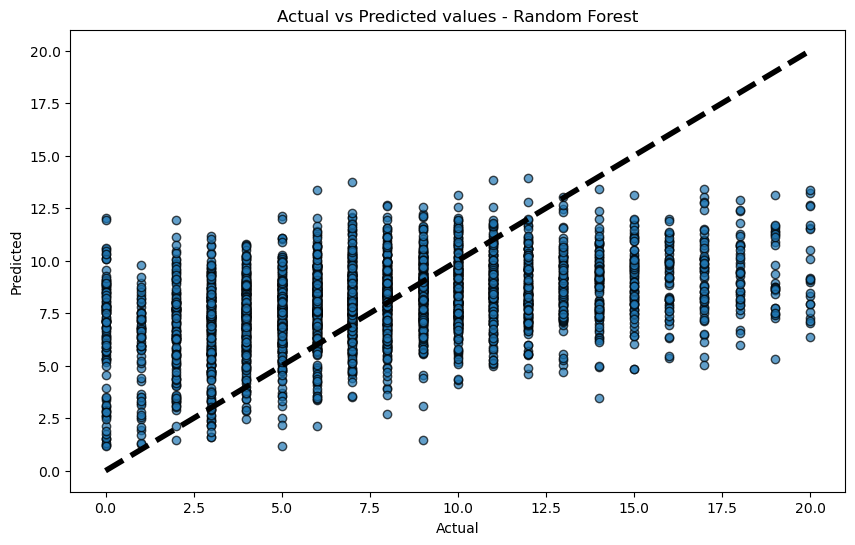

In [149]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from category_encoders import TargetEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

# Data processing
print("Processing dates...")
data['fecha'] = pd.to_datetime(data['fecha'])
data['year'] = data['fecha'].dt.year
data['month'] = data['fecha'].dt.month
data['day'] = data['fecha'].dt.day
data['day_of_week'] = data['fecha'].dt.dayofweek
data['hora_salida'] = pd.to_datetime(data['hora_salida'], format='%H:%M:%S', errors='coerce')

# Crear tarifas_promedio
#data['tarifas_promedio'] = data[['tarifa_mediabaja', 'tarifa_alta', 'tarifa_mediaalta', 'tarifa_baja']].mean(axis=1)

# Crear conexiones_promedio
#data['conexiones_promedio'] = data[['conexion_nacional', 'conexion_internacional', 'sin_conexion']].mean(axis=1)

# Seleccionar las variables relevantes, excluyendo 'inasistencia'
selected_columns = [
    'conexion_nacional','conexion_internacional', 'sin_conexion', 'tarifa_mediabaja', 'tarifa_alta', 'tarifa_mediaalta',  
    'tarifa_baja', 'agendados', 'sin_stock', 'destino', 'capacidad', 
    'pax_freqflyer', 'numero_vuelo', 'venta_usd', 'month', 'day_of_week', 'day', 'agendado_grupal', 
    'vuelo_denegado', 'year', 'origen'
]

data_selected = data[selected_columns]

# Dividir las características y la variable objetivo
X = data_selected
y = data['inasistencia']

# Aplicar Target Encoding a la variable 'numero_vuelo'
target_encoder = TargetEncoder(cols=['numero_vuelo'])
X['numero_vuelo'] = target_encoder.fit_transform(X['numero_vuelo'], y)

# Manejar características categóricas y numéricas
categorical_features = ['origen', 'destino']
numeric_features = X.columns.difference(categorical_features)

# Preprocesamiento para datos categóricos: imputación y codificación one-hot
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocesamiento para datos numéricos: imputación y normalización
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Combinar preprocesadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Ajustar el preprocesador y transformar los datos
X_processed = preprocessor.fit_transform(X)

# Calcular VIF para revisar la multicolinealidad
X_processed_df = pd.DataFrame(X_processed, columns=preprocessor.get_feature_names_out())
vif_data = pd.DataFrame()
vif_data["feature"] = X_processed_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_processed_df.values, i) for i in range(len(X_processed_df.columns))]
print("VIF Data:")
print(vif_data)
print('')
print('')

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest
model_rf = RandomForestRegressor(random_state=42, n_estimators=100)

# Ajustar el modelo
model_rf.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
y_pred = model_rf.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")

# Mostrar los valores predichos y reales
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(result_df.head(10))

# Graficar Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted values - Random Forest')
plt.show()


### GradientBoostingRegressor ####

Processing dates...
                feature       VIF
0        num__sin_stock  1.029886
1        num__capacidad  1.142671
2     num__numero_vuelo  1.017191
3        num__venta_usd  1.062331
4            num__month  1.027006
5      num__day_of_week  1.015415
6              num__day  1.001917
7  num__agendado_grupal  1.017412
8   num__vuelo_denegado  1.013456
9             num__year  1.105156

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Mean Squared Error: 15.609191671432471
Mean Absolute Error: 3.1305234214879722
R^2 Score: 0.16432099287448476
       Actual  Predicted
12512     4.0  10.056785
9461      0.0   3.363555
1301      3.0   7.763296
3086      3.0   6.798929
2139      2.0   7.188606
5356      8.0   7.487586
17099     4.0   7.977879
6807      8.0   6.981607
489      10.0   8.573498
13940     4.0   5.101565


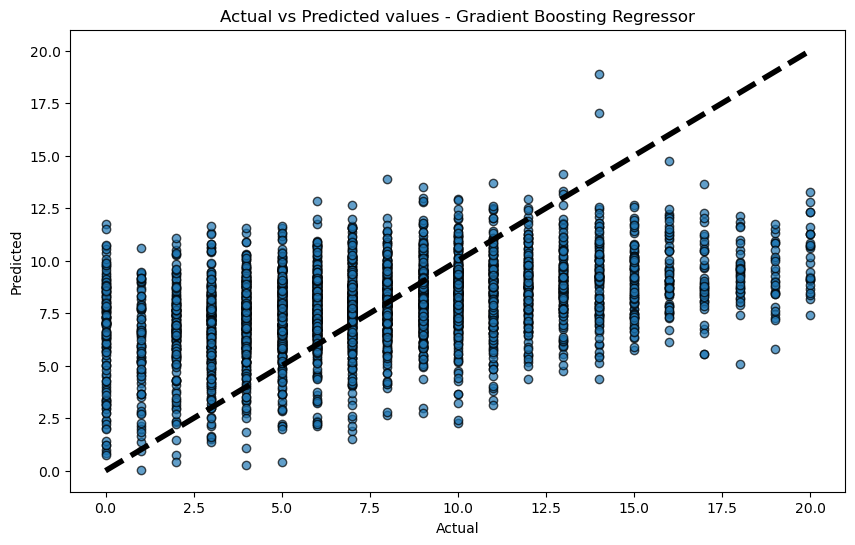

In [132]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from category_encoders import TargetEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

# Data processing
print("Processing dates...")
data['fecha'] = pd.to_datetime(data['fecha'])
data['year'] = data['fecha'].dt.year
data['month'] = data['fecha'].dt.month
data['day'] = data['fecha'].dt.day
data['day_of_week'] = data['fecha'].dt.dayofweek
data['hora_salida'] = pd.to_datetime(data['hora_salida'], format='%H:%M:%S', errors='coerce')

# Crear tarifas_promedio
data['tarifas_promedio'] = data[['tarifa_mediabaja', 'tarifa_alta', 'tarifa_mediaalta', 'tarifa_baja']].mean(axis=1)

# Crear conexiones_promedio
data['conexiones_promedio'] = data[['conexion_nacional', 'conexion_internacional', 'sin_conexion']].mean(axis=1)

# Seleccionar las variables relevantes, incluyendo 'inasistencia'
selected_columns = [
    'inasistencia', 'sin_stock', 'capacidad', 
    'numero_vuelo', 'venta_usd', 'month', 'day_of_week', 'day', 'agendado_grupal', 
    'vuelo_denegado', 'year'
]

data_selected = data[selected_columns]

# Dividir las características y la variable objetivo
X = data_selected.drop('inasistencia', axis=1)
y = data_selected['inasistencia']

# Aplicar Target Encoding a la variable 'numero_vuelo'
target_encoder = TargetEncoder(cols=['numero_vuelo'])
X['numero_vuelo'] = target_encoder.fit_transform(X['numero_vuelo'], y)

# Definir características numéricas
numeric_features = X.columns

# Preprocesamiento para datos numéricos: imputación y normalización
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Combinar preprocesadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ]
)

# Ajustar el preprocesador y transformar los datos
X_processed = preprocessor.fit_transform(X)

# Calcular VIF para revisar la multicolinealidad
X_processed_df = pd.DataFrame(X_processed, columns=preprocessor.get_feature_names_out())
vif_data = pd.DataFrame()
vif_data["feature"] = X_processed_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_processed_df.values, i) for i in range(len(X_processed_df.columns))]
print(vif_data)
print('')

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Definir el modelo de Gradient Boosting Regressor
model_gbr = GradientBoostingRegressor(random_state=42)

# Definir los hiperparámetros para el Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}

# Configurar el Grid Search
grid_search = GridSearchCV(estimator=model_gbr, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Ajustar el modelo con Grid Search
grid_search.fit(X_train, y_train)

# Mejor modelo obtenido por Grid Search
best_model = grid_search.best_estimator_

# Realizar predicciones y evaluar el mejor modelo
y_pred = best_model.predict(X_test)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")

# Mostrar los valores predichos y reales
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(result_df.head(10))

# Graficar Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted values - Gradient Boosting Regressor')
plt.show()


### RandomForestRegressor - Revisión colinealidad ###

Processing dates...
VIF Data:
                        feature       VIF
0          num__agendado_grupal  1.042272
1                num__capacidad  1.181943
2   num__conexion_internacional  1.052166
3        num__conexion_nacional  1.198929
4                      num__day  1.002112
5              num__day_of_week  1.142636
6                    num__month  1.055158
7             num__numero_vuelo  1.253027
8            num__pax_freqflyer  1.218860
9                num__sin_stock  1.045957
10             num__tarifa_alta  1.676262
11        num__tarifa_mediaalta  1.927576
12               num__venta_usd  1.932852
13          num__vuelo_denegado  1.018822
14                    num__year  1.325657
15              cat__origen_ANF       inf
16              cat__origen_SCL       inf
17             cat__destino_ANF       inf
18             cat__destino_SCL       inf


Mean Squared Error: 15.9840093837535
Mean Absolute Error: 3.1570616246498604
R^2 Score: 0.14425414378461454
       Actual  Predi

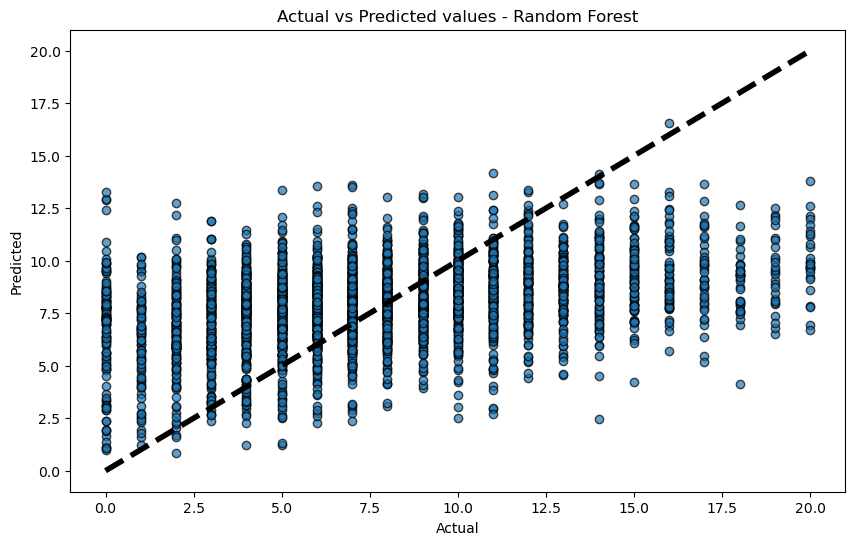

In [130]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from category_encoders import TargetEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

# Data processing
print("Processing dates...")
data['fecha'] = pd.to_datetime(data['fecha'])
data['year'] = data['fecha'].dt.year
data['month'] = data['fecha'].dt.month
data['day'] = data['fecha'].dt.day
data['day_of_week'] = data['fecha'].dt.dayofweek
data['hora_salida'] = pd.to_datetime(data['hora_salida'], format='%H:%M:%S', errors='coerce')

# Seleccionar las variables relevantes, sin las multicolineales
selected_columns = [
    'tarifa_alta', 'tarifa_mediaalta', 'sin_stock', 'destino', 'capacidad', 
    'pax_freqflyer', 'numero_vuelo', 'venta_usd', 'month', 'day_of_week', 'day', 'agendado_grupal', 'conexion_nacional', 'conexion_internacional',
    'vuelo_denegado', 'year', 'origen', 
]


data_selected = data[selected_columns]

# Dividir las características y la variable objetivo
X = data_selected
y = data['inasistencia']

# Aplicar Target Encoding a la variable 'numero_vuelo'
target_encoder = TargetEncoder(cols=['numero_vuelo'])
X['numero_vuelo'] = target_encoder.fit_transform(X['numero_vuelo'], y)

# Manejar características categóricas y numéricas
categorical_features = ['origen', 'destino']
numeric_features = X.columns.difference(categorical_features)

# Preprocesamiento para datos categóricos: imputación y codificación one-hot
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocesamiento para datos numéricos: imputación y normalización
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Combinar preprocesadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Ajustar el preprocesador y transformar los datos
X_processed = preprocessor.fit_transform(X)

# Calcular VIF para revisar la multicolinealidad
X_processed_df = pd.DataFrame(X_processed, columns=preprocessor.get_feature_names_out())
vif_data = pd.DataFrame()
vif_data["feature"] = X_processed_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_processed_df.values, i) for i in range(len(X_processed_df.columns))]
print("VIF Data:")
print(vif_data)
print('')
print('')

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest
model_rf = RandomForestRegressor(random_state=42, n_estimators=100)

# Ajustar el modelo
model_rf.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
y_pred = model_rf.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")

# Mostrar los valores predichos y reales
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(result_df.head(10))

# Graficar Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted values - Random Forest')
plt.show()
